In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

In [22]:
tickers = ['PG', 'TSLA', 'F', 'GE']
start = datetime.datetime(1995,1,1)
end = datetime.datetime(2017,3,23)
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start=start, end=end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [23]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5595 entries, 1995-01-03 to 2017-03-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      5595 non-null   float64
 1   TSLA    1695 non-null   float64
 2   F       5595 non-null   float64
 3   GE      5595 non-null   float64
dtypes: float64(4)
memory usage: 218.6 KB


In [32]:
mydata.head()

,PG,TSLA,F,GE
Date,,,,
1995-01-03,7.529937,NaN,3.674592,17.009962
1995-01-04,7.469576,NaN,3.773461,17.009962
1995-01-05,7.363945,NaN,3.740505,17.051643
1995-01-06,7.379034,NaN,3.740505,16.968258
1995-01-09,7.348852,NaN,3.806417,16.801506


In [25]:
mydata.tail()

,PG,TSLA,F,GE
Date,,,,
2017-03-16,75.101341,17.469999,8.818933,129.921753
2017-03-17,74.739975,17.433332,8.666164,130.489487
2017-03-20,74.920639,17.461332,8.527285,129.878098
2017-03-21,74.896011,16.712000,8.138419,128.349548
2017-03-22,74.731750,17.000668,8.173140,128.960999


Normalización a 100:$$\frac{P_i}{P_0}*100$$

In [26]:
mydata.iloc[0]

PG       7.529937
TSLA          NaN
F        3.674592
GE      17.009962
Name: 1995-01-03 00:00:00, dtype: float64

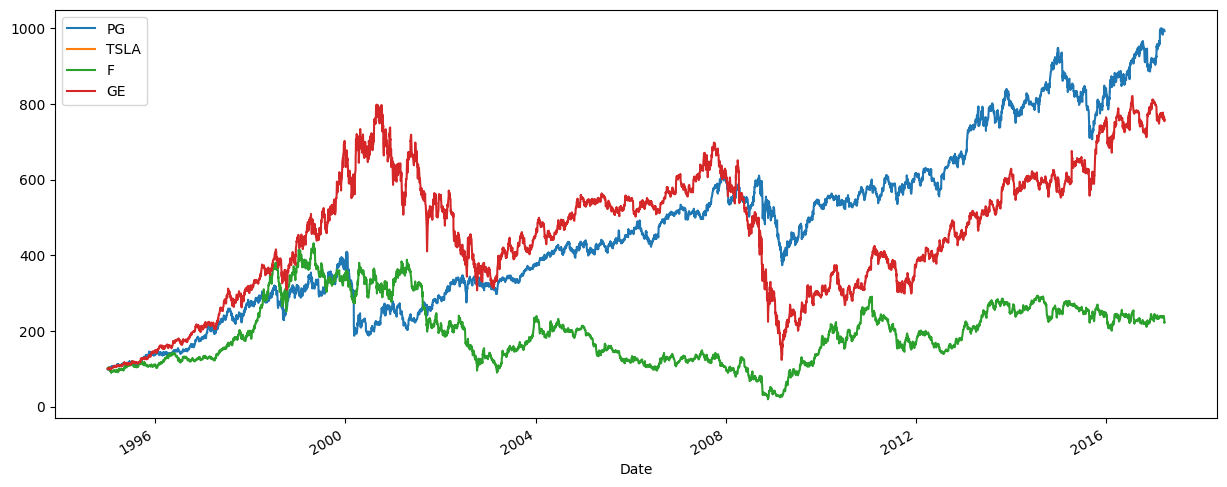

In [27]:
(mydata / mydata.iloc[0]*100).plot(figsize=(15,6))
plt.show()

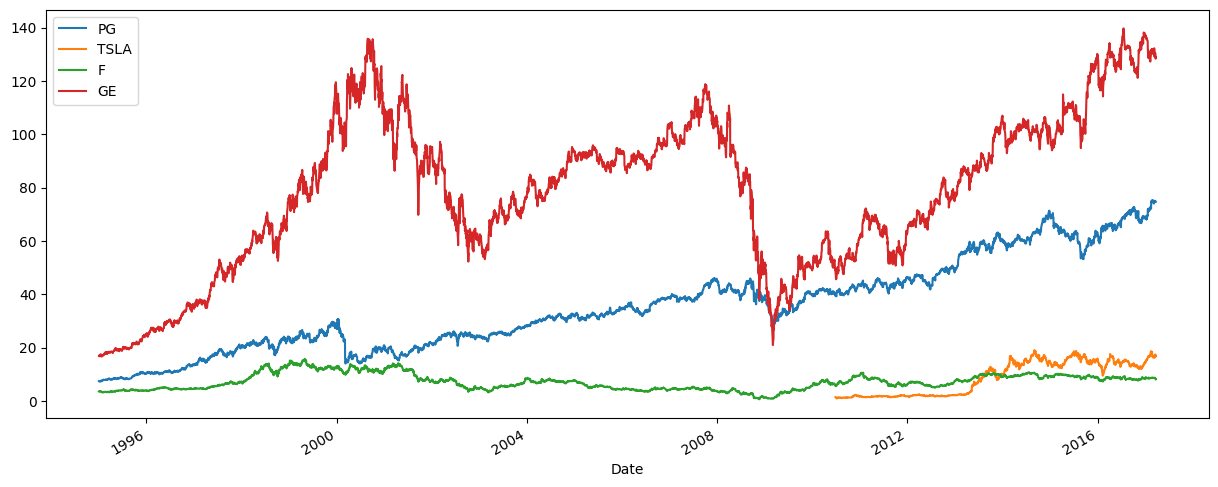

In [28]:
mydata.plot(figsize=(15,6))
plt.show()

In [29]:
mydata.loc['1995-1-03']

PG       7.529937
TSLA          NaN
F        3.674592
GE      17.009962
Name: 1995-01-03 00:00:00, dtype: float64

In [30]:
mydata.iloc[0]

PG       7.529937
TSLA          NaN
F        3.674592
GE      17.009962
Name: 1995-01-03 00:00:00, dtype: float64

### Calculo de los retornos de un portafolio

In [31]:
returns = (mydata / mydata.shift(1))-1
returns.head()

,PG,TSLA,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,NaN,0.026906,0.000000
1995-01-05,-0.014142,NaN,-0.008733,0.002450
1995-01-06,0.002049,NaN,0.000000,-0.004890
1995-01-09,-0.004090,NaN,0.017621,-0.009827


In [12]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [13]:
weights

array([0.25, 0.25, 0.25, 0.25])

In [14]:
np.dot(returns,weights)

array([        nan,  0.0065397 , -0.00922987, ..., -0.00434218,
       -0.0171973 ,  0.00490186])

In [15]:
annual_returns= returns.mean()*250
annual_returns

PG      0.128590
MSFT    0.196030
F       0.117966
GE      0.133520
dtype: float64

In [16]:
np.dot(annual_returns, weights)

0.1440264283371318

In [17]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5)* 100) + '%'
print(pfolio_1)

14.402999999999999%


In [18]:
weights_2= np.array([0.4, 0.4, 0.15, 0.05])

In [21]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5)* 100) + '%'
print(pfolio_1)
print(pfolio_2)

14.402999999999999%
15.421999999999999%
